In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.applications.vgg19 import VGG19

In [2]:
from google.colab import files, drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


### Labeling Dataset based on the Directory Names

In [3]:
datasetDir = '/content/Drive/MyDrive/Dataset'

# get the Subdirectory of the Dataset Folder
for root, folder, files in os.walk(datasetDir):
    if folder != []:
        listDir = folder

classes = []
# retrieve the name and the number of the classification
for i, category in enumerate(listDir):
    # print(category)
    classes.append(category)
    # classes.append({'name' : category,'id' : i + 1, "category" : category})
classes

['Bag',
 'Chair',
 'Cup',
 'Spoon',
 'Fork',
 'Soap',
 'Toothbrush',
 'Pen',
 'Toothpaste',
 'Pencil',
 'Plate',
 'Book',
 'Pencil Case',
 'Eraser',
 'Table']

### Import Dataset

In [4]:
from keras.preprocessing.image import ImageDataGenerator

# Create a datagen that is split the dataset into 80% Train and 20% Test
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    shear_range=20,
    zoom_range=0.5,
    width_shift_range=[-0.2, 0.2],
    height_shift_range=[-0.2, 0.2],
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2,
)

# val_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=90,
#     shear_range=0.2,
#     zoom_range=0.5,
#     width_shift_range=0.5,
#     height_shift_range=0.5,
#     horizontal_flip=True,
#     validation_split=0.2,
# )

test_datagen = ImageDataGenerator(
    # rescale=1./255,
)

# Training Set
training_set = datagen.flow_from_directory(
    datasetDir,
    target_size=(224,224),
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    subset="training",
    batch_size=32
)

# Validation Set
validation_set = datagen.flow_from_directory(
    datasetDir,
    target_size=(224,224),
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    subset="validation",
    batch_size=32
)

# test_set = test_datagen.flow_from_directory(
#     'Test Set',
#     target_size=(224,224),
#     class_mode='categorical',
#     color_mode='rgb',
#     shuffle=True,
#     batch_size=32
# )


Found 2615 images belonging to 15 classes.
Found 647 images belonging to 15 classes.


<h3>Load Model VGG-19</h3>

In [5]:
base_model = VGG19(weights='imagenet' , include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

In [6]:
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(classes) , activation='softmax')
])

In [7]:
for layer in model.layers:
  print(layer, layer.trainable)

<keras.engine.functional.Functional object at 0x7f87693bfc10> False
<keras.layers.core.flatten.Flatten object at 0x7f876936f190> True
<keras.layers.core.dense.Dense object at 0x7f876936f2d0> True
<keras.layers.core.dense.Dense object at 0x7f876936f6d0> True
<keras.layers.core.dropout.Dropout object at 0x7f8771d711d0> True
<keras.layers.core.dense.Dense object at 0x7f87ef2c67d0> True


In [8]:
from datetime import datetime

now = datetime.now()
date_string = now.strftime('%d-%m-%Y-%H-%M-%S')
start = date_string
start

'23-06-2022-12-20-09'

In [9]:
model_type = 'VGG-19-Adam-0.0001-AddLayer'
ckpt_path = f'/content/Drive/MyDrive/Checkpoints/{model_type}/Checkpoints/{model_type}-checkpoints' + date_string + '_{accuracy:.3f}.hdf5'
log_path = f'/content/Drive/MyDrive/Checkpoints/Log/{model_type}-training_log.csv'

In [10]:
record = open(f'/content/Drive/MyDrive/Checkpoints/Records/{model_type} record.txt' , 'a')
record.write(f'{model_type} \n')
record.write(f'Start : {start} \n')

29

### Callbacks

In [11]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        ckpt_path,
        monitor = 'val_accuracy',
        mode = 'max',
        save_freq='epoch',
        save_best_only= True,
        verbose= 1
    ),
    tf.keras.callbacks.CSVLogger(
        log_path,
        separator=',',
        append=True
    )
]

In [12]:
# model.load_weights(f'/content/Drive/MyDrive/Checkpoints/{model_type}/Checkpoints/VGG-19-Adam-0.0001-256Batch-checkpoints22-06-2022-14-55-27_0.678.hdf5')

In [13]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [14]:
model.fit(
    training_set,
    epochs = 100,
    verbose = 1,
    # initial_epoch=152,
    validation_data = validation_set,
    callbacks = callbacks,
    batch_size = 32,
    shuffle = True
)

Epoch 1/100
43/82 [==============>...............] - ETA: 29s - loss: 2.6375 - accuracy: 0.1251

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


82/82 [==============================] - ETA: 0s - loss: 2.5098 - accuracy: 0.1667
Epoch 1: val_accuracy improved from -inf to 0.28903, saving model to /content/Drive/MyDrive/Checkpoints/VGG-19-Adam-0.0001-AddLayer/Checkpoints/VGG-19-Adam-0.0001-AddLayer-checkpoints23-06-2022-12-20-09_0.167.hdf5
82/82 [==============================] - 85s 952ms/step - loss: 2.5098 - accuracy: 0.1667 - val_loss: 2.1776 - val_accuracy: 0.2890
Epoch 2/100
82/82 [==============================] - ETA: 0s - loss: 2.1209 - accuracy: 0.2933
Epoch 2: val_accuracy improved from 0.28903 to 0.36631, saving model to /content/Drive/MyDrive/Checkpoints/VGG-19-Adam-0.0001-AddLayer/Checkpoints/VGG-19-Adam-0.0001-AddLayer-checkpoints23-06-2022-12-20-09_0.293.hdf5
82/82 [==============================] - 73s 896ms/step - loss: 2.1209 - accuracy: 0.2933 - val_loss: 1.9415 - val_accuracy: 0.3663
Epoch 3/100
82/82 [==============================] - ETA: 0s - loss: 1.8701 - accuracy: 0.3568
Epoch 3: val_accuracy improved f

In [15]:
# model.evaluate(test_set, verbose=1)

In [16]:
model.save(f'/content/Drive/MyDrive/Checkpoints/Model/{model_type}.h5')

In [17]:
now = datetime.now()
date_string = now.strftime('%d-%m-%Y-%H-%M-%S')
end = date_string

In [18]:
record.write(f"End : {end}" )
record.close()

### Visualize Accuracy and Loss

In [19]:
import pandas as pd
csv = pd.read_csv(log_path)

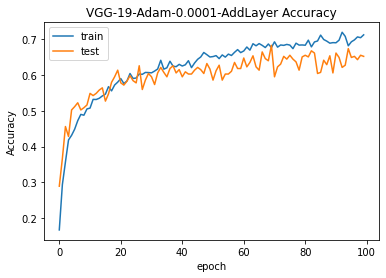

In [20]:
# summarize history for Accuracy
plt.plot(csv['accuracy'])
plt.plot(csv['val_accuracy'])
plt.title(f'{model_type} Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

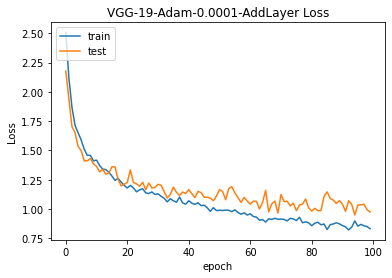

In [21]:
# summarize history for accuracy
plt.plot(csv['loss'])
plt.plot(csv['val_loss'])
plt.title(f'{model_type} Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()